In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Stop warnings
# -------------
import warnings
warnings.filterwarnings("ignore")

# General imports
# ---------------
import os
import sys
import json
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.colors as colors
import ipdb
import platform
opj = os.path.join
deb = ipdb.set_trace
%matplotlib inline
import time

# MRI imports
# -----------
import nibabel as nb
import cortex

subject = '999999'

# Define analysis parameters
# --------------------------
with open('../../settings.json') as f:
    json_s = f.read()
    analysis_info = json.loads(json_s)

# Define cluster/server specific parameters
# -----------------------------------------
if 'aeneas' in platform.uname()[1]:
    base_dir = analysis_info['aeneas_base_folder']
elif 'local' in platform.uname()[1]:
    base_dir = analysis_info['local_base_folder']

fit_model = 'gauss'
deriv_dir = opj(base_dir,'pp_data',subject,fit_model,'deriv')

# Create derivatives flatmaps
# ---------------------------
cmap_neg_pos = 'RdBu_r_alpha'#'BuBkRd'#'RdBu_r'
sign_idx, rsq_idx, ecc_idx, polar_real_idx, polar_imag_idx , size_idx, \
            non_lin_idx, amp_idx, baseline_idx, cov_idx, x_idx, y_idx = 0,1,2,3,4,5,6,7,8,9,10,11
mask_dir  = 'all'

# Get data and combine hemispheres
deriv_mat=[]
for hemi in ['L','R']:
    deriv_file = nb.load(opj(deriv_dir,mask_dir,"prf_deriv_{hemi}_{mask_dir}_fsaverage.func.gii".format(hemi = hemi, mask_dir = mask_dir)))
    deriv_mat.append(np.array([deriv_file.darrays[i].data for i in range(len(deriv_file.darrays))]))
deriv_mat = np.hstack(deriv_mat)
deriv_mat = deriv_mat.T

In [2]:
# R-square
rsq_data = deriv_mat[:,rsq_idx]

sign_data = deriv_mat[:,sign_idx]
sign_data = np.sign(sign_data)*rsq_data
norm_sign_data = (sign_data - np.nanmin(sign_data))/(np.nanmax(sign_data)-np.nanmin(sign_data))


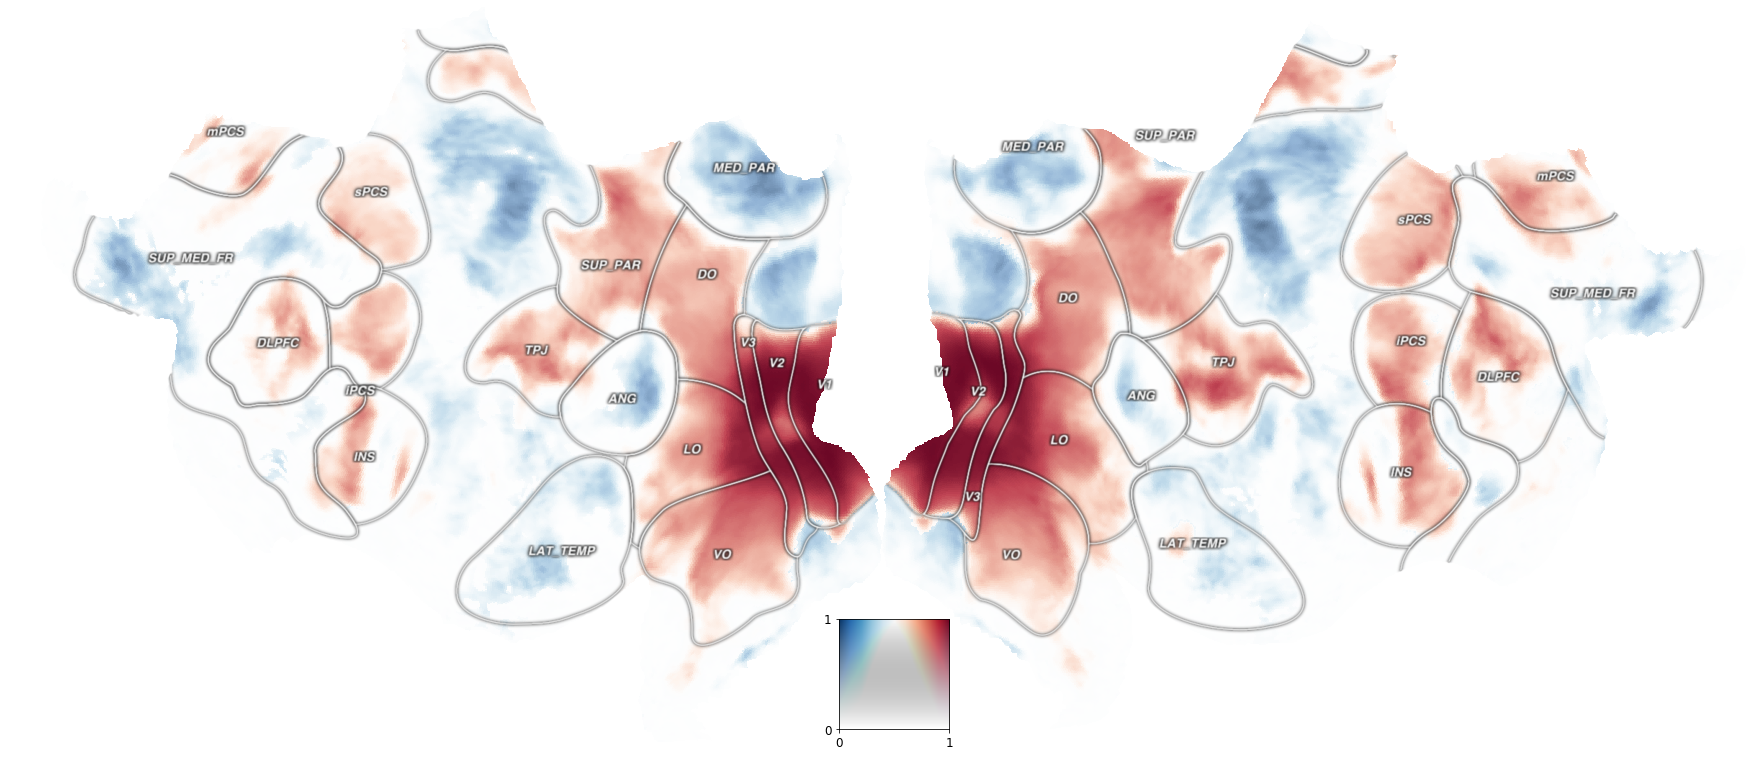

In [3]:
vertex_2d = cortex.Vertex2D(  dim1 = norm_sign_data, 
                              dim2 = rsq_data,
                              description = '2d',
                              subject = 'fsaverage', 
                              cmap = 'RdBu_r_alpha', 
                              vmin = 0,
                              vmax = 1,
                              vmin2 = 0,
                              vmax2 = 1,
                         )
vertex2 = cortex.quickshow(braindata = vertex_2d)

In [1]:
handle = cortex.webgl.show(data=vertex_2d, recache=True, port=13001)

NameError: name 'cortex' is not defined

In [ ]:
handle

In [5]:
# to set manually
# take out roi
# curvature brightness: 0.3
# curvature contrast: 0.3
# curvature smoothness: 0.1

flat = {'camera.altitude':0,
        'camera.azimuth':180,
        'camera.radius':300,
        'surface.{subject}.depth':1,
        'surface.{subject}.unfold':1, # 0 for reset 1 for flat
        'surface.{subject}.specularity':0,
                            }
handle._set_view(**flat)
time.sleep(5)
# handle.getImage('/Users/martin/Dropbox/Data/Manuscript/2018/Szinte_vanEs_Knapen/flat.png',size = (3840, 2160))

In [6]:
left_hemi_lateral_inflated = {'camera.altitude':90,
                             'camera.azimuth':90,
                             'camera.radius':300,
                             'surface.{subject}.unfold':0.5, # 0 for reset 1 for flat
                             'surface.{subject}.depth':1,
                              'surface.{subject}.left':True,
                             'surface.{subject}.right':False,
                             'surface.{subject}.specularity':0,
                            }
handle._set_view(**left_hemi_lateral_inflated)
time.sleep(5)
handle.getImage('/Users/martin/Dropbox/Data/Manuscript/2018/Szinte_vanEs_Knapen/left_lateral_inflated.png',size = (3840, 2160))

[{}]

In [ ]:
left_hemi_lateral = {'camera.altitude':90,
                     'camera.azimuth':90,
                     'camera.radius':300,
                     'surface.{subject}.unfold':0, # 0 for reset 1 for flat
                     'surface.{subject}.depth':1,
                     'surface.{subject}.left':True,
                     'surface.{subject}.right':False,
                     'surface.{subject}.specularity':0,
                    }
handle._set_view(**left_hemi_lateral)
time.sleep(5)
handle.getImage('/Users/martin/Dropbox/Data/Manuscript/2018/Szinte_vanEs_Knapen/left_lateral.png',size = (3840, 2160))

In [7]:
left_hemi_medial_inflated = {'camera.altitude':90,
                             'camera.azimuth':270,
                             'camera.radius':300,
                             'surface.{subject}.unfold':0.5, # 0 for reset 1 for flat
                             'surface.{subject}.depth':1,
                             'surface.{subject}.left':True,
                             'surface.{subject}.right':False,
                             'surface.{subject}.specularity':0,
                            }
handle._set_view(**left_hemi_medial_inflated)
time.sleep(5)
handle.getImage('/Users/martin/Dropbox/Data/Manuscript/2018/Szinte_vanEs_Knapen/left_medial_inflated.png',size = (3840, 2160))

[{}]

In [ ]:
left_hemi_medial = {'camera.altitude':90,
                     'camera.azimuth':270,
                     'camera.radius':300,
                     'surface.{subject}.unfold':0, # 0 for reset 1 for flat
                     'surface.{subject}.depth':1,
                     'surface.{subject}.left':True,
                     'surface.{subject}.right':False,
                     'surface.{subject}.specularity':0,
                    }

handle._set_view(**left_hemi_medial)
time.sleep(5)
handle.getImage('/Users/martin/Dropbox/Data/Manuscript/2018/Szinte_vanEs_Knapen/left_medial.png',size = (3840, 2160))

In [ ]:
right_hemi_lateral = {'camera.altitude':90,
                     'camera.azimuth':270,
                     'camera.radius':300,
                     'surface.{subject}.unfold':0, # 0 for reset 1 for flat
                     'surface.{subject}.depth':1,
                     'surface.{subject}.left':False,
                     'surface.{subject}.right':True,
                     'surface.{subject}.specularity':0,
                    }

handle._set_view(**right_hemi_lateral)
time.sleep(5)
handle.getImage('/Users/martin/Dropbox/Data/Manuscript/2018/Szinte_vanEs_Knapen/right_lateral.png',size = (3840, 2160))

In [ ]:
right_hemi_lateral_inflated = {  'camera.altitude':90,
                                 'camera.azimuth':270,
                                 'camera.radius':300,
                                 'surface.{subject}.unfold':0.5, # 0 for reset 1 for flat
                                 'surface.{subject}.depth':1,
                                 'surface.{subject}.left':False,
                                 'surface.{subject}.right':True,
                                 'surface.{subject}.specularity':0,
                                }

handle._set_view(**right_hemi_lateral_inflated)
time.sleep(5)
handle.getImage('/Users/martin/Dropbox/Data/Manuscript/2018/Szinte_vanEs_Knapen/right_lateral_inflated.png',size = (3840, 2160))

In [ ]:
right_hemi_medial = {'camera.altitude':90,
                     'camera.azimuth':90,
                     'camera.radius':300,
                     'surface.{subject}.unfold':0, # 0 for reset 1 for flat
                     'surface.{subject}.depth':1,
                     'surface.{subject}.left':False,
                     'surface.{subject}.right':True,
                     'surface.{subject}.specularity':0,
                    }
handle._set_view(**right_hemi_medial)
time.sleep(5)
handle.getImage('/Users/martin/Dropbox/Data/Manuscript/2018/Szinte_vanEs_Knapen/right_medial.png',size = (3840, 2160))

In [ ]:
right_hemi_medial_inflated = {   'camera.altitude':90,
                                 'camera.azimuth':90,
                                 'camera.radius':300,
                                 'surface.{subject}.unfold':0.5, # 0 for reset 1 for flat
                                 'surface.{subject}.depth':1,
                                 'surface.{subject}.left':False,
                                 'surface.{subject}.right':True,
                                 'surface.{subject}.specularity':0,
                                }
handle._set_view(**right_hemi_medial_inflated)
time.sleep(5)
handle.getImage('/Users/martin/Dropbox/Data/Manuscript/2018/Szinte_vanEs_Knapen/right_medial_inflated.png',size = (3840, 2160))

In [ ]:
dorsal_inflated = {   'camera.altitude':90,
                      'camera.azimuth':180,
                      'camera.radius':300,
                      'surface.{subject}.unfold':0.5, # 0 for reset 1 for flat
                      'surface.{subject}.left':True,
                      'surface.{subject}.depth':1,
                      'surface.{subject}.right':True,
                      'surface.{subject}.specularity':0.2,
                                }
handle._set_view(**dorsal_inflated)
time.sleep(5)
handle.getImage('/Users/martin/Dropbox/Data/Manuscript/2018/Szinte_vanEs_Knapen/dorsal_inflated.png',size = (3840, 2160))

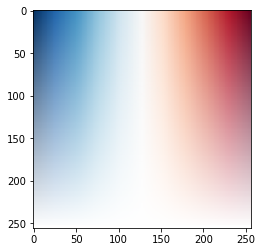

In [154]:
# create colorscale
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.image as mpimg
from matplotlib import cm
import matplotlib as mpl
import ipdb
deb = ipdb.set_trace

cmap = 'RdBu_r_alpha'
cmap_png_file = "{base_dir}/pp_data/cortex/colormaps/{cmap}.png".format(base_dir = base_dir, cmap = cmap)
img = mpimg.imread(cmap_png_file)
plt.imshow(img)
plt.show()

In [240]:
base = cortex.utils.get_cmap('jet')
val = np.fmod(np.linspace(0, 1,256,endpoint=False),1.0)
colmap = colors.LinearSegmentedColormap.from_list(  'my_colmap',
                                                    base(val),
                                                    N = 256)
base

In [102]:
new_col = np.zeros((256,4))
for t_step in np.arange(0,128,1):
    new_col[t_step,0:4] = img[t_step,t_step*2]
    
for t_step in np.arange(128,256,1):
    new_col[t_step,0:4] = img[t_step,256-(t_step-128)*2]
    

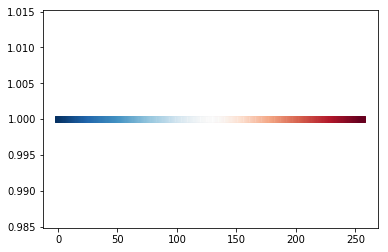

In [262]:
a = np.linspace(0,255,128)
b = a[::-1]
c = np.hstack([a,b])
d = np.linspace(0,255,256)

col_new = []
for t in np.arange(0,256,1):
    val_y = int(d[t])
    val_x = int(c[t])
    col = img[val_x,val_y]
    col_new.append(img[val_x,val_y])
#     print(val_x,val_y,col)

col_new = np.vstack(col_new)
plt.scatter(np.linspace(0,256,256), np.linspace(0,256,256)*0+1, marker='s', c=col_new)

In [258]:
np.vstack(col_new)

(256,)

In [145]:
np.arange(0,256,1).shape

(256,)

In [152]:
img[0,255]

array([ 0.40392157,  0.        ,  0.12156863,  1.        ], dtype=float32)